In [1]:
import numpy as np
from model import Model
from torch.utils.data import DataLoader
from celeba_dataset import CelebaDataset, IMG_SHAPE, data_transforms

import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../data'
MODEL_PATH = '../model/'
ANNOTATION_DATA_PATH = f'{DATA_DIR}/list_attr_celeba.csv'
DATA_PATH = f'{DATA_DIR}/img_align_celeba'


In [3]:
dataset = CelebaDataset(ANNOTATION_DATA_PATH, DATA_PATH, transform=data_transforms)
all_labels = np.array(list(dataset.labels))

VAE_PARAMS = {
    'latent_dim_size': 8,
    'data_shape': IMG_SHAPE,
    'label_shape': len(dataset.labels)
}

In [4]:
#m = Model.load(MODEL_PATH)
m = Model(VAE_PARAMS)

Model parameters: 619216


In [5]:
def reconstruction(dataset, example_count=8):
    dataloader = DataLoader(dataset, example_count, shuffle=True)
    data_x, data_y = next(iter(dataloader))
    decoded = m.transform(data_x, data_y).detach().numpy()
    print(decoded.shape)
    print(all_labels)
    fig, ax = plt.subplots(example_count, 2, figsize=(10, 10))
    for i in range(example_count):
        pic, labels = data_x[i], data_y[i]
        l_i = list(map(lambda z: bool(z), labels.numpy()))
        labels_txt = ', '.join(all_labels[l_i])
        ax[i, 0].imshow(np.moveaxis(np.array(pic), 0, -1))
        ax[i, 0].set_title(labels_txt)
        ax[i, 0].axis('off')

        ax[i, 1].imshow(np.moveaxis(decoded[i], 0, -1))
        #ax[i, 1].set_title(labels_txt)
        ax[i, 1].axis('off')
    plt.show()

(5, 3, 224, 184)
['5_o_Clock_Shadow' 'Arched_Eyebrows' 'Attractive' 'Bags_Under_Eyes'
 'Bald' 'Bangs' 'Big_Lips' 'Big_Nose' 'Black_Hair' 'Blond_Hair' 'Blurry'
 'Brown_Hair' 'Bushy_Eyebrows' 'Chubby' 'Double_Chin' 'Eyeglasses'
 'Goatee' 'Gray_Hair' 'Heavy_Makeup' 'High_Cheekbones' 'Male'
 'Mouth_Slightly_Open' 'Mustache' 'Narrow_Eyes' 'No_Beard' 'Oval_Face'
 'Pale_Skin' 'Pointy_Nose' 'Receding_Hairline' 'Rosy_Cheeks' 'Sideburns'
 'Smiling' 'Straight_Hair' 'Wavy_Hair' 'Wearing_Earrings' 'Wearing_Hat'
 'Wearing_Lipstick' 'Wearing_Necklace' 'Wearing_Necktie' 'Young']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


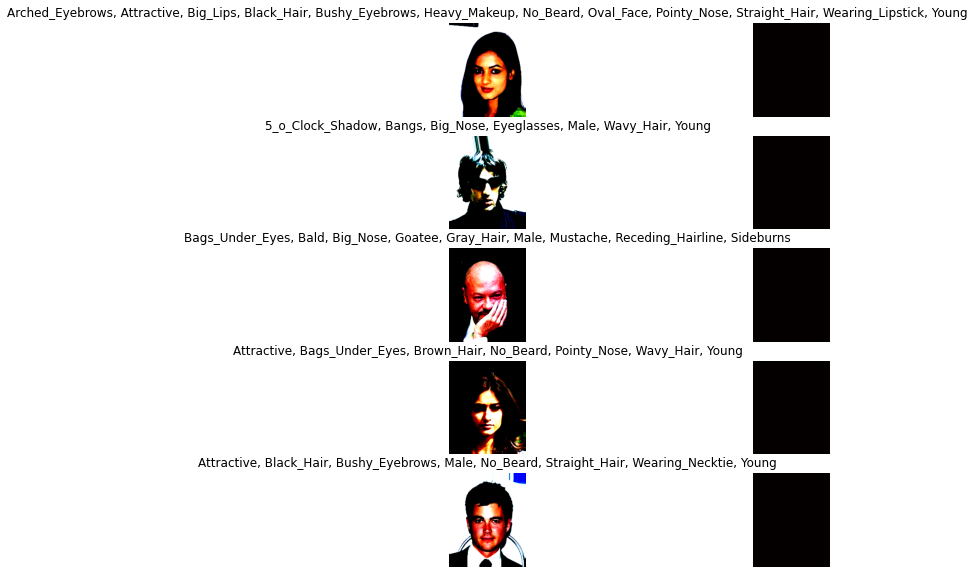

In [9]:
reconstruction(dataset, 5)

In [10]:
def creation(labels):
    labels_encoded = [[1 if l in labels else 0 for l in all_labels]]
    generated = m.generate_random_with_label(labels_encoded).detach().numpy()[0]
    plt.imshow(np.moveaxis(generated, 0, -1))

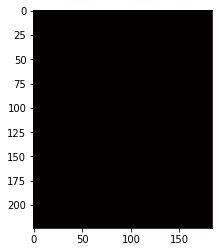

In [11]:
creation([])

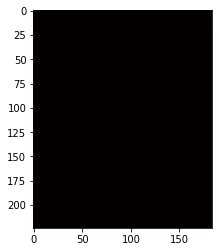

In [12]:
creation(['Arched_Eyebrows'])